In [1]:
 !pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d mertbozkurt5/image-colorization

 97% 413M/424M [00:03<00:00, 145MB/s]
100% 424M/424M [00:03<00:00, 135MB/s]


In [6]:
import zipfile
with zipfile.ZipFile("/content/image-colorization.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

##Model 1 
- batchsize 32, 
- 300 epoch


In [8]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

path = '/content/datadir/'

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=32, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


Convert from RGB to Lab

In [9]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

(32, 256, 256, 1)
(32, 256, 256, 2)


In [10]:
from keras.layers.core.dropout import Dropout

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [11]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [ ]:
model.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

# Model2

- Train batch 710
- less complex model

In [13]:
path = '/content/datadir/'

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [14]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(710, 256, 256, 1)
(710, 256, 256, 2)


In [15]:

#Encoder
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model1.add(UpSampling2D((2, 2)))

In [16]:
model1.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 128)       295040    
                                                                 
 up_sampling2d_3 (UpSampling  (None, 64, 64, 128)     

In [ ]:
model1.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

# Model3
- Less complex and dropout

In [52]:
path = '/content/datadir/'

train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [53]:
X =[]
Y =[]
for img in train[0]:
  lab = rgb2lab(img)
  X.append(lab[:,:,0]) 
  Y.append(lab[:,:,1:] / 128) 
  
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(710, 256, 256, 1)
(710, 256, 256, 2)


In [54]:
from keras.layers.core.dropout import Dropout

#Encoder
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))

In [55]:
model3.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_38 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 128)     0         
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 128)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 256)      

In [ ]:
model3.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

###Models
model
- accuracy: 0.7866 - val_accuracy: 0.7758

model1
- accuracy: 0.8432  - val_accuracy: 0.6941

model3

- accuracy: 0.8210 - val_loss: 0.0221 - val_accuracy: 0.6905



## Test result

Download test images

In [39]:
from PIL import Image
import requests
from io import BytesIO

url1 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/old-barn-in-black-and-white-randall-nyhof.jpg'

url2 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/horizontal-black-and-white-photograph-of-a-lake-michigan-sunset-randall-nyhof.jpg'

url3 = 'https://images.unsplash.com/photo-1614925861087-aa06270091b3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8OXx8YmxhY2slMjBhbmQlMjB3aGl0ZSUyMG5hdHVyZXxlbnwwfHwwfHw%3D&w=1000&q=80'

url4 = 'https://images.squarespace-cdn.com/content/538a3874e4b0ab1541d204ad/1490210210601-DDAMF95MFG8RQ7T1M56V/?content-type=image%2Fjpeg'

url_list = [url1,url2,url3,url4]

In [40]:
import matplotlib.pyplot as plt

Model 1 

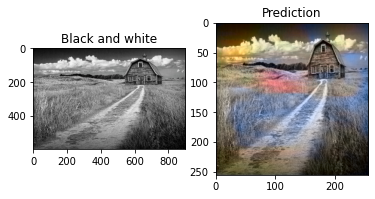

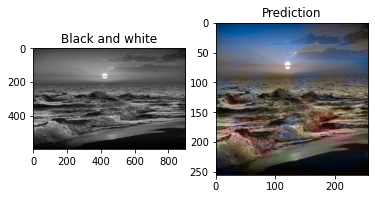

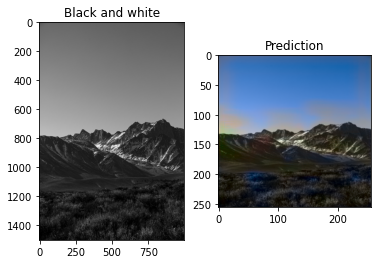

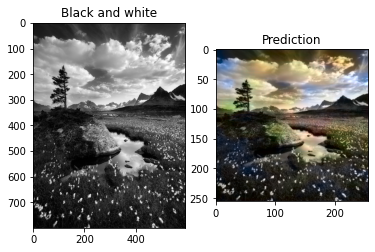

In [42]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

Model 2

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


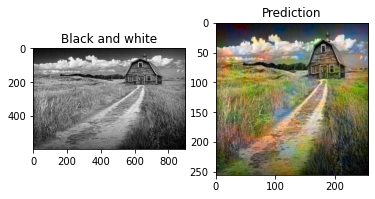

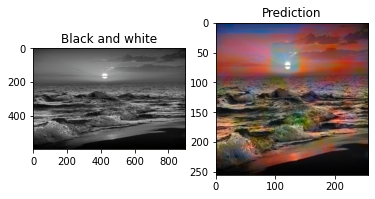

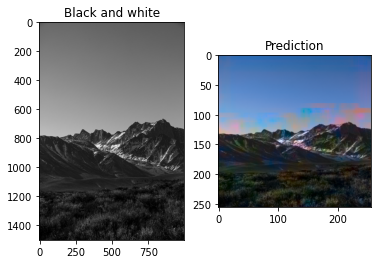

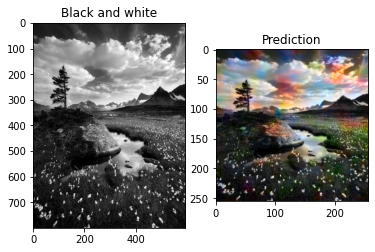

In [43]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model1.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

Model 3

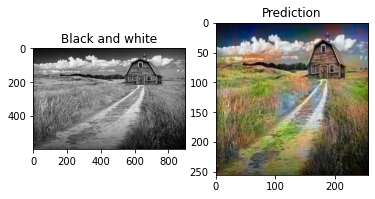

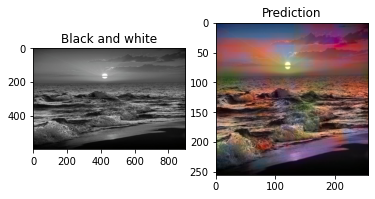

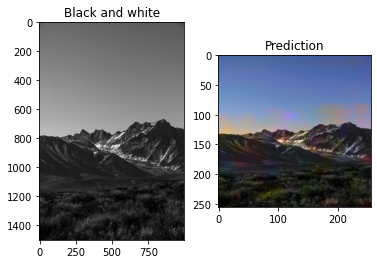

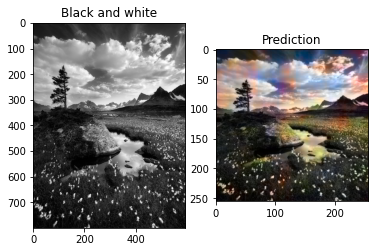

In [46]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model3.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

### Save model

In [57]:
model1.save('image-colorization.h5')

### Load model

In [58]:
model = tf.keras.models.load_model('/content/image-colorization.h5')